### Create a synthetic dataset

In [1]:
# used for working with datasets
import pandas as pd

# Randomly generates values. 
import random

# for performing numerical operations
import numpy as np

# import Faker for creating fake names
from faker import Faker

In [2]:
# initialize the function
fake = Faker()

In [3]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define the size of the dataset
dataset_size = 400000

# Define empty data frame
data = pd.DataFrame()

# Generate Fake names
data['Name']=[fake.name() for i in range(dataset_size)]

# Generate 'Age' data (assuming a normal distribution)
data['Age'] = np.random.normal(40, 10, dataset_size).astype(int)

# Generate 'Gender' data (assuming a binary distribution)
data['Gender'] = np.random.choice(['Male', 'Female'], dataset_size)

# Generate 'Race' data (assuming five categories)
data['Race'] = np.random.choice(['1', '2', '3', '4', '5'], dataset_size)

# Create relationships between variables and 'Side Effect'
# Assume that older individuals, males, and races 1,2 have a higher likelihood of experiencing side effects
data['Side Effect'] = 'Absent'  # Initialize with 0
data.loc[(data['Age'] > 50) & (data['Gender'] == 'Male') & (data['Race'] == '1'), 'Side Effect'] = 'Present'
data.loc[(data['Age'] < 30) & (data['Gender'] == 'Female') & (data['Race'] == '2'), 'Side Effect'] = 'Present'

# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

# Check the first few rows of the dataset
print(data)

                   Name  Age  Gender Race Side Effect
0           Ross Moreno   45    Male    3      Absent
1         Bradley Stone   41  Female    2      Absent
2       Shannon Johnson   32  Female    4      Absent
3            Kevin Hunt   30  Female    2      Absent
4           Tracy Giles   52  Female    1      Absent
...                 ...  ...     ...  ...         ...
399995    Clifford Beck   44  Female    2      Absent
399996   Kayla Browning   44  Female    4      Absent
399997    Heather Terry   45    Male    5      Absent
399998     Henry Suarez   18  Female    3      Absent
399999   Charles Acosta   44  Female    1      Absent

[400000 rows x 5 columns]


In [4]:
# Save the dataset into a csv file
data.to_csv('tcs.csv')

### Exploratory Data Analysis

In [5]:
# basic understanding about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Name         400000 non-null  object
 1   Age          400000 non-null  int32 
 2   Gender       400000 non-null  object
 3   Race         400000 non-null  object
 4   Side Effect  400000 non-null  object
dtypes: int32(1), object(4)
memory usage: 13.7+ MB


In [6]:
# Check for the unique values of the Gender column
data['Gender'].value_counts()

Male      200288
Female    199712
Name: Gender, dtype: int64

In [7]:
# Check for the unique values of the Race column
data['Race'].value_counts()

3    80258
2    80235
1    79998
4    79924
5    79585
Name: Race, dtype: int64

In [8]:
# Check for the balance of the dataset
data['Side Effect'].value_counts()

Absent     388269
Present     11731
Name: Side Effect, dtype: int64

In [9]:
import matplotlib.pyplot as plt

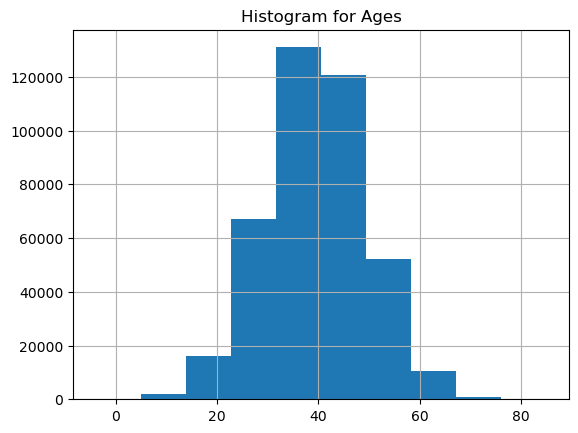

In [10]:
# check for the distribution of Age
data['Age'].hist()
plt.title('Histogram for Ages')
plt.show()

### Pre-processing dataset

In [11]:
# Drop the columns, key and names since these do not contribute in
# classifying Side effects
data.drop(['Name'],axis=1, inplace = True)

In [12]:
# Encode the target variable "Effect"
# Encode the 'Gender' and 'Race' variables using OHE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
# Initialize 
le = LabelEncoder()

In [14]:
#Fit and tranform the column
data['Side Effect']=le.fit_transform(data['Side Effect'])

In [15]:
# save as category data type
data['Gender'] = data['Gender'].astype('category')
data['Race'] = data['Race'].astype('category')
  
# Save as numerical values
data['Gender'] = data['Gender'].cat.codes
data['Race'] = data['Race'].cat.codes
  
# Create an instance of One-hot-encoder
enc = OneHotEncoder()
  
# Passing encoded columns
enc_data = pd.DataFrame(enc.fit_transform(data[['Gender', 'Race']]).toarray(),columns=['GenderM','GenderF','Race1','Race2','Race3','Race4','Race5'])
  
# Merge with main
data.drop(['Gender','Race'],axis=1,inplace = True)
New_df = data.join(enc_data)
  
print(New_df)

        Age  Side Effect  GenderM  GenderF  Race1  Race2  Race3  Race4  Race5
0        45            0      0.0      1.0    0.0    0.0    1.0    0.0    0.0
1        41            0      1.0      0.0    0.0    1.0    0.0    0.0    0.0
2        32            0      1.0      0.0    0.0    0.0    0.0    1.0    0.0
3        30            0      1.0      0.0    0.0    1.0    0.0    0.0    0.0
4        52            0      1.0      0.0    1.0    0.0    0.0    0.0    0.0
...     ...          ...      ...      ...    ...    ...    ...    ...    ...
399995   44            0      1.0      0.0    0.0    1.0    0.0    0.0    0.0
399996   44            0      1.0      0.0    0.0    0.0    0.0    1.0    0.0
399997   45            0      0.0      1.0    0.0    0.0    0.0    0.0    1.0
399998   18            0      1.0      0.0    0.0    0.0    1.0    0.0    0.0
399999   44            0      1.0      0.0    1.0    0.0    0.0    0.0    0.0

[400000 rows x 9 columns]


In [16]:
# from sklearn.preprocessing import Standard Scaler
from sklearn.preprocessing import StandardScaler

In [17]:
# Initialize
scaler = StandardScaler()

In [18]:
# Fit and transform the data using Standard scaling
age=np.array(New_df['Age'])
age=age.reshape(-1, 1)
New_df['Age'] = scaler.fit_transform(age)
New_df

,Age,Side Effect,GenderM,GenderF,Race1,Race2,Race3,Race4,Race5
0,0.549581,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.149856,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.749525,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.949388,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.249100,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
399995,0.449650,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
399996,0.449650,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
399997,0.549581,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
399998,-2.148563,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Modelling

In [19]:
# Assign the independent and dependent variables
y = New_df['Side Effect']
x = New_df.drop('Side Effect',axis=1)

In [20]:
# Use hold-out method to divide the data into train and test data
from sklearn.model_selection import train_test_split

In [21]:
# Since the dataset is not balanced, use the Stratification technique
# Stratification ensures a proportional representation of y in test and train
x_train, x_test,y_train, y_test =train_test_split(x,y,test_size=0.2, stratify=y, random_state=42)

In [22]:
# since the dataset is imbalanced, use F1 score to compare
from sklearn.metrics import f1_score

# 1. Logistic Regression

In [23]:
# Import logistic regression package
from sklearn.linear_model import LogisticRegression

In [24]:
# Initialize and Fit
lr_classifier =LogisticRegression(random_state=42)

In [25]:
# Fit the model
lr_classifier= lr_classifier.fit(x_train,y_train)

In [26]:
# Check for prediction score
y_pred = lr_classifier.predict(x_test)
score_LR = f1_score(y_test,y_pred)
score_LR

0.0

# 2. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# initialize with 2 parameters
rfclassifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy')

# fit the model on the training dataset
rfclassifier = rfclassifier.fit(x_train, y_train)

# Predict the values for the test data
rf_pred = rfclassifier.predict(x_test)

# measure the f1 score 
score_rf = f1_score(y_test,rf_pred)
score_rf

1.0

# 3. Support vector Machine Classifier

In [29]:
# import the Support Vector Classifier
from sklearn.svm import SVC 

In [30]:
# initialize
svc = SVC()

In [31]:
# fit the training data
svc.fit(x_train, y_train)

SVC()

In [32]:
# make predictions using the model based on test data
svc_pred = svc.predict(x_test)

# measure the f1 score
score_svc = f1_score(y_test,svc_pred)
score_svc

1.0

# 4. K Nearest Neighbors

In [33]:
# import knn  
from sklearn.neighbors import KNeighborsClassifier  

In [34]:
# initialize
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

# fit the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
# predict the values for knn model 
knn_pred = knn.predict(x_test)

C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
knn_score = f1_score(y_test, knn_pred)
knn_score

1.0

# 5. Naive Bayes Algorithm

In [37]:
# import Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB  

In [38]:
# initialize
nb_classifier = GaussianNB()  

# fit the model on training data
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [39]:
# Predict the values
nb_pred = nb_classifier.predict(x_test)

# f1 score of the predicted values
nb_score = f1_score(y_test,nb_pred)
nb_score

0.13719298245614034

# Conclusion

In [40]:
# Define the models and the f1 scores in lists 
Models = ['Logistic Regression','Support Vector Machine','Random forest','K Nearest Neighbors Classifier','Naive Bayes']
Scores =[score_LR, score_svc, score_rf, knn_score,nb_score]

# Compile into a single Dataframe
Results = pd.DataFrame([Models,Scores]).T
Results.columns = ['Models','f1_Scores']
Results

,Models,f1_Scores
0,Logistic Regression,0.0
1,Support Vector Machine,1.0
2,Random forest,1.0
3,K Nearest Neighbors Classifier,1.0
4,Naive Bayes,0.137193


Comparing the above-given 5 models, the best model are
Support Vector Machine, Random Forest, and K Nearest Neighbors